In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\HousingData.csv",na_values='NA')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
for i in df.columns:
    mean_value = df[i].mean()
    df[i].fillna(mean_value,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11952\3880722073.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(mean_value,inplace=True)


In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

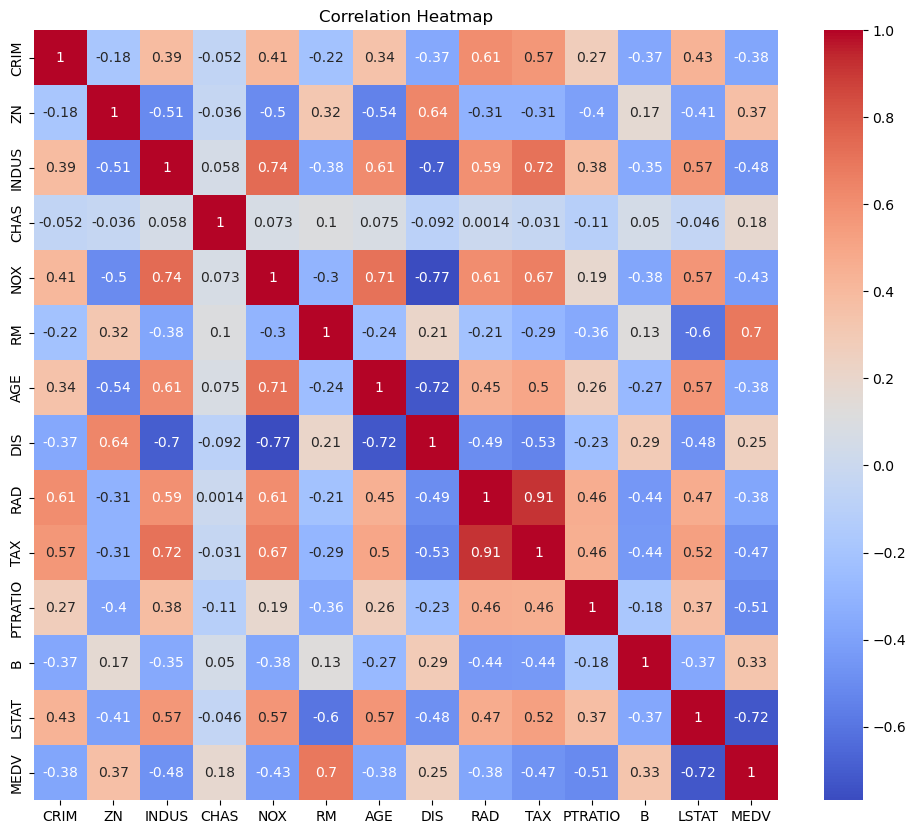

In [7]:
# Heatmap of feature correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

x = df.drop('MEDV', axis=1)
y = df['MEDV']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=123)

In [9]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(x_train)
x_train = mms.transform(x_train)
x_test = mms.transform(x_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_shape=(13,),activation='relu', name = 'dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1,activation='linear',name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_output (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(x_train,y_train, epochs = 100, validation_split = 0.05, verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 615.9886 - mae: 23.0099 - val_loss: 615.6859 - val_mae: 22.9087
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 582.8518 - mae: 22.1085 - val_loss: 578.3884 - val_mae: 22.0553
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 509.9996 - mae: 20.6909 - val_loss: 518.9056 - val_mae: 20.6157
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 473.3966 - mae: 19.3882 - val_loss: 426.5751 - val_mae: 18.1305
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 347.3231 - mae: 16.1727 - val_loss: 305.5694 - val_mae: 14.3716
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 246.9882 - mae: 12.5999 - val_loss: 191.7148 - val_mae: 10.2211
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 159.2748 - mae: 9.8244 - val_loss: 135.8714 - val_mae: 8.2423
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 126.5706 - mae: 8.7402 - val_loss: 121.5915 - val_mae: 7.8956
Epoch 9/100


In [12]:
mse_nn, mae_nn = model.evaluate(x_test,y_test)
print('Msq: ',mse_nn)
print('Maq: ',mae_nn)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 32.4319 - mae: 3.5926 
Msq:  24.61781120300293
Maq:  3.2801735401153564


In [13]:
y_pred = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [14]:
import numpy as np
y_test = np.array(y_test).reshape(-1,1)

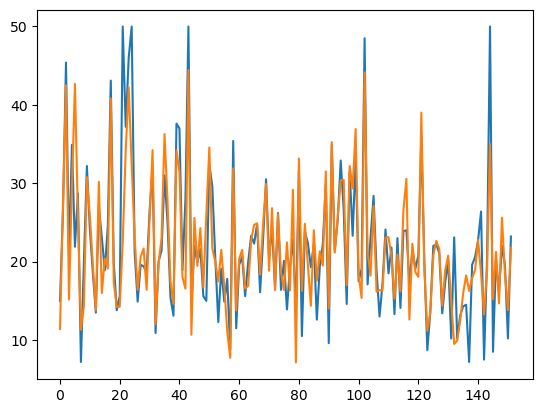

In [15]:

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Pred')